<a href="https://colab.research.google.com/github/unnimaayaa231/wine-type--prediction/blob/main/wine_type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WINE TYPE PREDICTION

In [ ]:
#importing necessary packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')




In [ ]:
df=pd.read_csv("/content/drive/MyDrive/data sets/winequality (1).csv")
df

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
5316,5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
5317,5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
5318,5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
#number of rows and columns in the dataset
df.shape

(5320, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5320 non-null   int64  
 1   fixed acidity         5320 non-null   float64
 2   volatile acidity      5320 non-null   float64
 3   citric acid           5320 non-null   float64
 4   residual sugar        5320 non-null   float64
 5   chlorides             5320 non-null   float64
 6   free sulfur dioxide   5320 non-null   float64
 7   total sulfur dioxide  5320 non-null   float64
 8   density               5320 non-null   float64
 9   pH                    5320 non-null   float64
 10  sulphates             5320 non-null   float64
 11  alcohol               5320 non-null   float64
 12  quality               5320 non-null   int64  
 13  is_red                5320 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 582.0 KB


# 1 - fixed acidity: The acids that naturally occur in the grapes used to ferment the wine and carry over into the wine. They mostly consist of tartaric, malic, citric or succinic acid that mostly originate from the grapes used to ferment the wine. They also do not evaporate easily. (g / dm^3)

# 2 - volatile acidity: Acids that evaporate at low temperatures—mainly acetic acid which can lead to an unpleasant, vinegar-like taste at very high levels. (g / dm^3)

# 3 - citric acid: Citric acid is used as an acid supplement which boosts the acidity of the wine. It's typically found in small quantities and can add 'freshness' and flavor to wines. (g / dm^3)

# 4 - residual sugar: The amount of sugar remaining after fermentation stops. It's rare to find wines with less than 1 gram/liter. Wines residual sugar level greater than 45 grams/liter are considered sweet. On the other end of the spectrum, a wine that does not taste sweet is considered as dry. (g / dm^3)

# 5 - chlorides: The amount of chloride salts (sodium chloride) present in the wine. (g / dm^3)

# 6 - free sulfur dioxide: The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. All else constant, the higher the free sulfur dioxide content, the stronger the preservative effect. (mg / dm^3)

# 7 - total sulfur dioxide: The amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. (mg / dm^3)

# 8 - density: The density of wine juice depending on the percent alcohol and sugar content; it's typically similar but higher than that of water (wine is 'thicker'). (g / cm^3)
# 9 - pH: A measure of the acidity of wine; most wines are between 3-4 on the pH scale. The lower the pH, the more acidic the wine is; the higher the pH, the less acidic the wine. (The pH scale technically is a logarithmic scale that measures the concentration of free hydrogen ions floating around in your wine. Each point of the pH scale is a factor of 10. This means a wine with a pH of 3 is 10 times more acidic than a wine with a pH of 4)

# 10 - sulphates: Amount of potassium sulphate as a wine additive which can contribute to sulfur dioxide gas (S02) levels; it acts as an antimicrobial and antioxidant agent.(g / dm3)

# 11 - alcohol: How much alcohol is contained in a given volume of wine (ABV). Wine generally contains between 5–15% of alcohols. (% by volume)
# Output variable:

# 12 - wine type: 1 (red) 0 (white)



In [ ]:
#checking missing values
df.isna().sum()

Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
is_red                  0
dtype: int64

In [ ]:
#ensure all the columns have numerical datatype
df.dtypes

Unnamed: 0                int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
is_red                    int64
dtype: object

In [ ]:
#statistical measures of the dataset
df.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,2659.500000,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.255451
std,1535.896047,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,1329.750000,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,2659.500000,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,0.000000
75%,3989.250000,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,5319.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [ ]:
df.rename(columns={'is_red':'wine type'})

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
5316,5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
5317,5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
5318,5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
df.drop(['Unnamed: 0','quality'],axis=1,inplace=True)

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


In [ ]:
#splitting the dataset into input and output
X=df.iloc[:,:-1]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [ ]:
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
5315    0
5316    0
5317    0
5318    0
5319    0
Name: is_red, Length: 5320, dtype: int64

In [ ]:
#scaling the dataset to normalise the range of features
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(X)
x_scaled

array([[0.29752066, 0.41333333, 0.        , ..., 0.6124031 , 0.19101124,
        0.20289855],
       [0.33057851, 0.53333333, 0.        , ..., 0.37209302, 0.25842697,
        0.26086957],
       [0.33057851, 0.45333333, 0.02409639, ..., 0.41860465, 0.24157303,
        0.26086957],
       ...,
       [0.2231405 , 0.10666667, 0.11445783, ..., 0.20930233, 0.13483146,
        0.20289855],
       [0.14049587, 0.14      , 0.18072289, ..., 0.48062016, 0.08988764,
        0.69565217],
       [0.18181818, 0.08666667, 0.22891566, ..., 0.41860465, 0.05617978,
        0.55072464]])

In [ ]:
#splitting the data into training and testing
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,random_state=1,test_size=0.3)

In [ ]:
X_train.shape

(3724, 11)

In [ ]:
y_train.shape

(3724,)

In [ ]:
X_test.shape

(1596, 11)

In [ ]:
y_test.shape

(1596,)

In [ ]:
#initializing an instance for each classifier
knn=KNeighborsClassifier()
sv=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
algo_accuracy=[]

In [ ]:
models=[knn,svc,rf,ad,nb,dt]
for model in models:
  print("********************",model,"*****************8")
  model.fit(x_train,y_train)


In [ ]:
#training each model and displaying its accuracy
models=[knn,sv,nb,dt,rf,ad]
for model in models:
  print('********************************',model,'***********************************')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print("Accuracy score=",accuracy_score(y_test,y_pred))
  algo_accuracy.append(accuracy_score(y_test,y_pred)*100)

******************************** KNeighborsClassifier() ***********************************
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1193
           1       0.97      0.98      0.97       403

    accuracy                           0.99      1596
   macro avg       0.98      0.98      0.98      1596
weighted avg       0.99      0.99      0.99      1596

Accuracy score= 0.9868421052631579
******************************** SVC() ***********************************
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1193
           1       0.99      0.99      0.99       403

    accuracy                           0.99      1596
   macro avg       0.99      0.99      0.99      1596
weighted avg       0.99      0.99      0.99      1596

Accuracy score= 0.993734335839599
******************************** GaussianNB() ***********************************
              precision    r

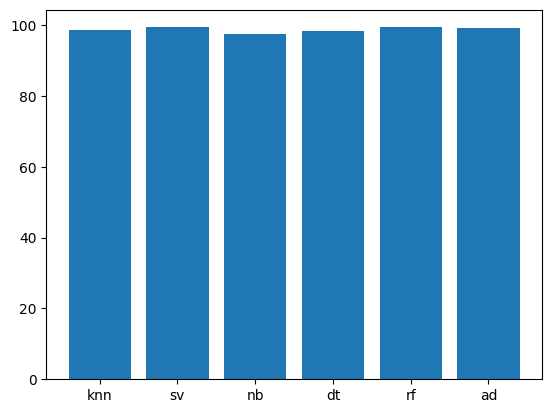

In [ ]:
x1=['knn','sv','nb','dt','rf','ad']
y1=algo_accuracy
plt.bar(x1,y1)
plt.show()

In [ ]:
#checking dataset is imbalanced or not
y.value_counts()

0    3961
1    1359
Name: is_red, dtype: int64

<Axes: xlabel='is_red', ylabel='count'>

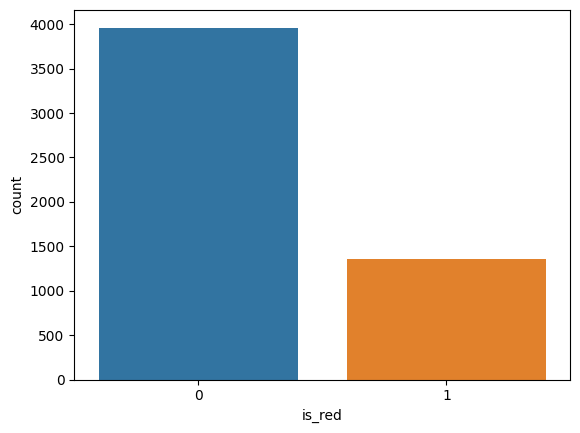

In [ ]:
sns.countplot(x=y,data=df)

In [ ]:
#oversampling
oversample=SMOTE(random_state=1)
X_os,y_os=oversample.fit_resample(X,y)

In [ ]:
y_os.value_counts()

1    3961
0    3961
Name: is_red, dtype: int64

In [ ]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

In [ ]:
knn_os=KNeighborsClassifier()
sv_os=SVC()
nb_os=GaussianNB()
dt_os=DecisionTreeClassifier()
rf_os=RandomForestClassifier()
ad_os=AdaBoostClassifier()
algo_accuracy1=[]
models=[knn_os,sv_os,nb_os,dt_os,rf_os,ad_os]
for model in models:
  print('********************************',model,'***********************************')
  model.fit(X_train_os,y_train_os)
  y_pred_os=model.predict(X_test_os)
  print(classification_report(y_test_os,y_pred_os))
  print("Accuracy score=",accuracy_score(y_test_os,y_pred_os))
  algo_accuracy1.append(accuracy_score(y_test_os,y_pred_os)*100)


******************************** KNeighborsClassifier() ***********************************
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1189
           1       0.92      0.95      0.94      1188

    accuracy                           0.93      2377
   macro avg       0.94      0.93      0.93      2377
weighted avg       0.94      0.93      0.93      2377

Accuracy score= 0.9347917543121582
******************************** SVC() ***********************************
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1189
           1       0.94      0.85      0.89      1188

    accuracy                           0.90      2377
   macro avg       0.90      0.90      0.90      2377
weighted avg       0.90      0.90      0.90      2377

Accuracy score= 0.8994530921329407
******************************** GaussianNB() ***********************************
              precision    

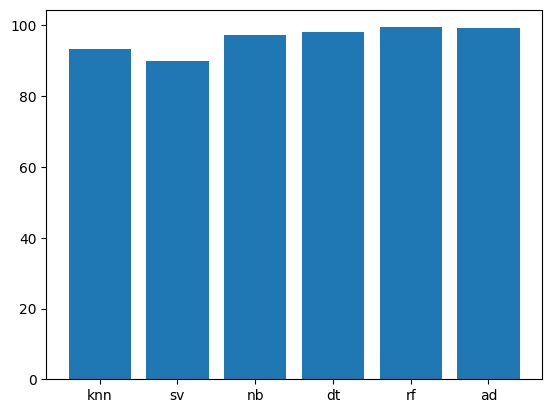

In [ ]:
x2=['knn','sv','nb','dt','rf','ad']
y2=algo_accuracy1
plt.bar(x2,y2)
plt.show()

In [ ]:
#undersampling
undersampler=RandomUnderSampler(random_state=1)
X_us,y_us=undersampler.fit_resample(X,y)

In [ ]:
y_us.value_counts()

0    1359
1    1359
Name: is_red, dtype: int64

In [ ]:
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_us,y_us,test_size=0.3,random_state=1)

In [ ]:
knn_us=KNeighborsClassifier()
sv_us=SVC()
nb_us=GaussianNB()
dt_us=DecisionTreeClassifier()
rf_us=RandomForestClassifier()
ad_us=AdaBoostClassifier()
algo_accuracy2=[]
models=[knn_us,sv_us,nb_us,dt_us,rf_us,ad_us]
for model in models:
  print('********************************',model,'***********************************')
  model.fit(X_train_us,y_train_us)
  y_pred_us=model.predict(X_test_us)
  print(classification_report(y_test_us,y_pred_us))
  print("Accuracy_score=",accuracy_score(y_test,y_pred))
  algo_accuracy2.append(accuracy_score(y_test_us,y_pred_us)*100)

******************************** KNeighborsClassifier() ***********************************
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       411
           1       0.92      0.92      0.92       405

    accuracy                           0.92       816
   macro avg       0.92      0.92      0.92       816
weighted avg       0.92      0.92      0.92       816

Accuracy_score= 0.9906015037593985
******************************** SVC() ***********************************
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       411
           1       0.93      0.87      0.90       405

    accuracy                           0.90       816
   macro avg       0.90      0.90      0.90       816
weighted avg       0.90      0.90      0.90       816

Accuracy_score= 0.9906015037593985
******************************** GaussianNB() ***********************************
              precision    

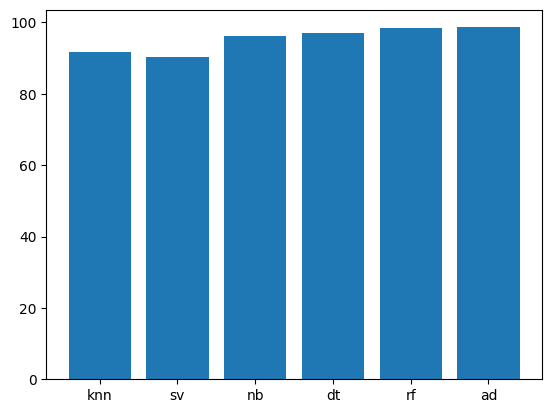

In [ ]:
x3=['knn','sv','nb','dt','rf','ad']
y3=algo_accuracy2
plt.bar(x3,y3)
plt.show()

In [ ]:
#hyperparameter tuning
knn1=KNeighborsClassifier()
params={'n_neighbors':[3,5,7,9],
        'weights':['uniform','distance'],
        'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(knn1,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}


In [ ]:
knn_new=KNeighborsClassifier(n_neighbors=7,weights='distance',algorithm='auto')
knn_new.fit(X_train,y_train)
y_pred=knn_new.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1193
           1       0.98      0.98      0.98       403

    accuracy                           0.99      1596
   macro avg       0.98      0.98      0.98      1596
weighted avg       0.99      0.99      0.99      1596



ACCURACY SCORE= 99.53723180479595
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1189
           1       1.00      0.99      1.00      1188

    accuracy                           1.00      2377
   macro avg       1.00      1.00      1.00      2377
weighted avg       1.00      1.00      1.00      2377



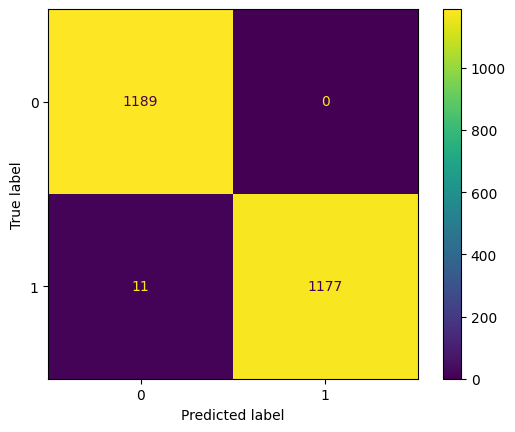

In [ ]:
#best performing
rf_os=RandomForestClassifier()
rf_os.fit(X_train_os,y_train_os)
y_pred_os=rf_os.predict(X_test_os)
print('ACCURACY SCORE=',accuracy_score(y_test_os,y_pred_os)*100)
print(classification_report(y_test_os,y_pred_os))
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_os))

In [ ]:
#predicting  new value
y_new=rf_os.predict([[7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8]])
if y_new==1:
  print("wine type is red")
else:
  print("wine type is white")

wine type is red


In [ ]:
input_data=(7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4)
input_np=np.asarray(input_data)
input_np_reshaped=input_np.reshape(1,-1)
y_pred=rf_os.predict(input_np_reshaped)
print(y_pred)
if(y_pred[0]==0):
  print("wine type is white")
else:
  print("wine type is red")

[1]
wine type is red


In [ ]:
input_np

array([ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
        0.9978,  3.51  ,  0.56  ,  9.4   ])

In [ ]:
input_np_reshaped

array([[ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
         0.9978,  3.51  ,  0.56  ,  9.4   ]])

In [ ]:
import pickle

In [ ]:
#saving trained model
pickle.dump(rf_os,open('model.pkl','wb'))

In [ ]:
pickle.dump(scaler,open('scaler.pkl','wb'))

In [ ]:
#loading saved model
loaded_model=pickle.load(open('model.pkl','rb'))

In [ ]:
input_data=(7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4)
input_np=np.asarray(input_data)
input_np_reshaped=input_np.reshape(1,-1)
y_pred=loaded_model.predict(input_np_reshaped)
print(y_pred)
if(y_pred[0]==0):
  print("wine type is white")
else:
  print("wine type is red")


[1]
wine type is red


In [ ]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 116.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00


In [ ]:
! pip install streamlit

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.138.38.79


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
npx: installed 22 in 4.077s
your url is: https://chilly-tools-look.loca.lt
